In [116]:
import csv
from statistics import mean 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor

In [70]:
cpcb15 = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\Airveda&cpcb_15min.csv")

In [73]:
cpcb15

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10
0,0,2020-11-01 00:00:00,82.0,127.0,73,172
1,1,2020-11-01 00:15:00,83.0,125.0,73,172
2,2,2020-11-01 00:30:00,76.0,117.0,73,172
3,3,2020-11-01 01:00:00,81.0,120.5,80,158
4,4,2020-11-01 01:15:00,83.0,118.0,80,158
...,...,...,...,...,...,...
2703,2703,2020-12-06 00:45:00,61.0,103.0,52,109
2704,2704,2020-12-07 11:15:00,57.0,95.0,34,85
2705,2705,2020-12-07 11:30:00,49.0,84.0,34,85
2706,2706,2020-12-07 11:45:00,49.0,81.0,33,84


In [72]:
cpcb15['created_at'] = pd.to_datetime(cpcb15['created_at'], dayfirst= True)

In [37]:
lc2 = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\LC2.csv")

In [38]:
lc2

,created_at,lc2_pm10,lc2_pm25
0,2020-11-01 00:00:00 IST,62.7,56.6
1,2020-11-01 00:00:30 IST,62.6,56.7
2,2020-11-01 00:01:00 IST,62.0,55.9
3,2020-11-01 00:01:30 IST,62.5,56.4
4,2020-11-01 00:02:00 IST,62.4,56.0
...,...,...,...
97550,2020-12-07 11:58:00 IST,24.7,22.3
97551,2020-12-07 11:58:30 IST,22.9,20.9
97552,2020-12-07 11:59:00 IST,20.5,18.8
97553,2020-12-07 11:59:30 IST,22.1,20.2


In [39]:
lc2['created_at'] = pd.to_datetime(lc2['created_at'])

C:\Users\spand\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [42]:
lc2

,created_at,lc2_pm10,lc2_pm25
0,2020-11-01 00:00:00,62.7,56.6
1,2020-11-01 00:00:30,62.6,56.7
2,2020-11-01 00:01:00,62.0,55.9
3,2020-11-01 00:01:30,62.5,56.4
4,2020-11-01 00:02:00,62.4,56.0
...,...,...,...
97550,2020-12-07 11:58:00,24.7,22.3
97551,2020-12-07 11:58:30,22.9,20.9
97552,2020-12-07 11:59:00,20.5,18.8
97553,2020-12-07 11:59:30,22.1,20.2


In [74]:
output1 = pd.merge(cpcb15, lc2,  
                   on='created_at',  
                   how='inner') 

In [75]:
output1

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10,lc2_pm10,lc2_pm25
0,0,2020-11-01 00:00:00,82.0,127.0,73,172,62.7,56.6
1,1,2020-11-01 00:15:00,83.0,125.0,73,172,61.3,55.4
2,2,2020-11-01 00:30:00,76.0,117.0,73,172,59.4,53.8
3,3,2020-11-01 01:00:00,81.0,120.5,80,158,60.7,54.9
4,4,2020-11-01 01:15:00,83.0,118.0,80,158,56.3,50.7
...,...,...,...,...,...,...,...,...
2594,2677,2020-12-05 17:45:00,40.0,86.0,37,106,26.4,22.2
2595,2681,2020-12-05 18:45:00,48.0,95.0,51,148,33.6,27.6
2596,2705,2020-12-07 11:30:00,49.0,84.0,34,85,28.1,25.5
2597,2706,2020-12-07 11:45:00,49.0,81.0,33,84,27.1,24.7


In [76]:
lc3 = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\LC3.csv")

In [77]:
lc3.head()

,created_at,lc3_pm10,lc3_pm25
0,2020-11-01 00:00:00 IST,1999.9,999.9
1,2020-11-01 00:00:30 IST,1999.9,999.9
2,2020-11-01 00:01:00 IST,1999.9,999.9
3,2020-11-01 00:01:30 IST,1999.9,999.9
4,2020-11-01 00:02:00 IST,1999.9,999.9


In [79]:
lc3['created_at'] = pd.to_datetime(lc3['created_at'])

C:\Users\spand\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [80]:
lc3.head()

,created_at,lc3_pm10,lc3_pm25
0,2020-11-01 00:00:00,1999.9,999.9
1,2020-11-01 00:00:30,1999.9,999.9
2,2020-11-01 00:01:00,1999.9,999.9
3,2020-11-01 00:01:30,1999.9,999.9
4,2020-11-01 00:02:00,1999.9,999.9


In [81]:
output2 = pd.merge(output1, lc3,  
                   on='created_at',  
                   how='inner') 

In [82]:
output2

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10,lc2_pm10,lc2_pm25,lc3_pm10,lc3_pm25
0,0,2020-11-01 00:00:00,82.0,127.0,73,172,62.7,56.6,1999.9,999.9
1,1,2020-11-01 00:15:00,83.0,125.0,73,172,61.3,55.4,1999.9,999.9
2,2,2020-11-01 00:30:00,76.0,117.0,73,172,59.4,53.8,1999.9,999.9
3,3,2020-11-01 01:00:00,81.0,120.5,80,158,60.7,54.9,1999.9,999.9
4,4,2020-11-01 01:15:00,83.0,118.0,80,158,56.3,50.7,1999.9,999.9
...,...,...,...,...,...,...,...,...,...,...
2542,2674,2020-12-05 17:00:00,35.0,78.0,31,78,23.3,20.2,60.9,26.9
2543,2681,2020-12-05 18:45:00,48.0,95.0,51,148,33.6,27.6,82.4,40.2
2544,2705,2020-12-07 11:30:00,49.0,84.0,34,85,28.1,25.5,47.2,39.9
2545,2706,2020-12-07 11:45:00,49.0,81.0,33,84,27.1,24.7,47.4,36.7


In [84]:
output2.to_csv('cpcb_with_lc2&3_15min.csv')

In [85]:
cpcb1 = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\Airveda&cpcb_1h.csv")


In [86]:
cpcb1

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10
0,0,2020-11-01 00:00:00,82.0,127.0,73.0,172.0
1,1,2020-11-01 01:00:00,81.0,120.5,80.0,158.0
2,2,2020-11-01 02:00:00,81.0,116.0,67.0,132.0
3,3,2020-11-01 03:00:00,83.0,126.0,69.0,133.0
4,4,2020-11-01 04:00:00,81.0,121.0,71.0,152.0
...,...,...,...,...,...,...
676,676,2020-12-05 21:00:00,73.0,123.0,76.0,174.0
677,677,2020-12-05 22:00:00,74.0,122.0,79.0,170.0
678,678,2020-12-05 23:00:00,68.0,117.0,75.0,161.0
679,679,2020-12-06 00:00:00,64.0,108.0,60.0,139.0


In [89]:
cpcb1['created_at'] = pd.to_datetime(cpcb1['created_at'], yearfirst= True)

In [90]:
cpcb1

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10
0,0,2020-11-01 00:00:00,82.0,127.0,73.0,172.0
1,1,2020-11-01 01:00:00,81.0,120.5,80.0,158.0
2,2,2020-11-01 02:00:00,81.0,116.0,67.0,132.0
3,3,2020-11-01 03:00:00,83.0,126.0,69.0,133.0
4,4,2020-11-01 04:00:00,81.0,121.0,71.0,152.0
...,...,...,...,...,...,...
676,676,2020-12-05 21:00:00,73.0,123.0,76.0,174.0
677,677,2020-12-05 22:00:00,74.0,122.0,79.0,170.0
678,678,2020-12-05 23:00:00,68.0,117.0,75.0,161.0
679,679,2020-12-06 00:00:00,64.0,108.0,60.0,139.0


In [91]:
out1 = pd.merge(cpcb1, lc2,  
                   on='created_at',  
                   how='inner') 

In [92]:
out1

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10,lc2_pm10,lc2_pm25
0,0,2020-11-01 00:00:00,82.0,127.0,73.0,172.0,62.7,56.6
1,1,2020-11-01 01:00:00,81.0,120.5,80.0,158.0,60.7,54.9
2,2,2020-11-01 02:00:00,81.0,116.0,67.0,132.0,55.2,50.1
3,3,2020-11-01 03:00:00,83.0,126.0,69.0,133.0,58.5,52.7
4,4,2020-11-01 04:00:00,81.0,121.0,71.0,152.0,55.6,50.2
...,...,...,...,...,...,...,...,...
648,669,2020-12-05 13:00:00,36.0,68.0,33.0,74.0,22.4,20.2
649,670,2020-12-05 14:00:00,35.0,62.0,26.0,72.0,21.6,19.6
650,671,2020-12-05 15:00:00,31.0,64.0,31.0,74.0,19.1,16.9
651,673,2020-12-05 17:00:00,35.0,78.0,31.0,78.0,23.3,20.2


In [93]:
out2 = pd.merge(out1, lc3,  
                   on='created_at',  
                   how='inner') 

In [94]:
out2

,Unnamed: 0,created_at,air_pm25,air_pm10,cpcb_pm25,cpcb_pm10,lc2_pm10,lc2_pm25,lc3_pm10,lc3_pm25
0,0,2020-11-01 00:00:00,82.0,127.0,73.0,172.0,62.7,56.6,1999.9,999.9
1,1,2020-11-01 01:00:00,81.0,120.5,80.0,158.0,60.7,54.9,1999.9,999.9
2,2,2020-11-01 02:00:00,81.0,116.0,67.0,132.0,55.2,50.1,1999.9,999.9
3,3,2020-11-01 03:00:00,83.0,126.0,69.0,133.0,58.5,52.7,1999.9,999.9
4,4,2020-11-01 04:00:00,81.0,121.0,71.0,152.0,55.6,50.2,1999.9,999.9
...,...,...,...,...,...,...,...,...,...,...
636,669,2020-12-05 13:00:00,36.0,68.0,33.0,74.0,22.4,20.2,37.6,26.9
637,670,2020-12-05 14:00:00,35.0,62.0,26.0,72.0,21.6,19.6,42.6,27.6
638,671,2020-12-05 15:00:00,31.0,64.0,31.0,74.0,19.1,16.9,37.4,22.9
639,673,2020-12-05 17:00:00,35.0,78.0,31.0,78.0,23.3,20.2,60.9,26.9


In [95]:
out2.to_csv('cpcb_with_lc2&3_1h.csv')

In [96]:
lc15min = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\cpcb_with_lc2&3_15min.csv")

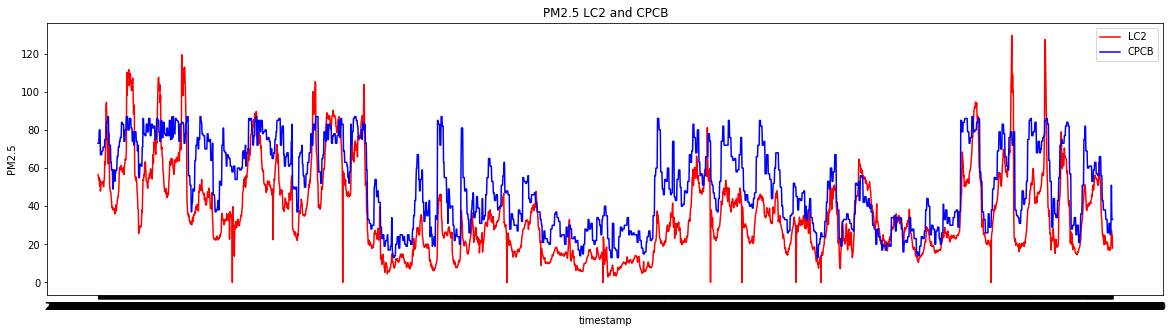

In [97]:
x = lc15min['created_at']
y1 = lc15min['lc2_pm25']
y2 = lc15min['cpcb_pm25']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["LC2","CPCB"])
plt.title('PM2.5 LC2 and CPCB')
plt.show()

In [113]:
# calculate summary statistics
cl15_mean, cl15_std = np.mean(lc15min['lc2_pm25']), np.std(lc15min['lc2_pm25'])

# identify outliers
cut_off = cl15_std * 3
lower, upper = cl15_mean - cut_off, cl15_mean + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
print("mean and standard deviation: ", cl15_mean, cl15_std)
#identifying outliers
outliers = [x for x in lc15min['lc2_pm25'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in lc15min['lc2_pm25']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
cl15m  = lc15min[lc15min['lc2_pm25'] > lower]
Lc15m = cl15m[cl15m['lc2_pm25'] < upper] 

cut off:  66.60467488914229
lower and upper boundaries:  -30.72 102.49
mean and standard deviation:  35.88476639183346 22.201558296380764
Identified outliers: 35
Non-outlier observations: 2512


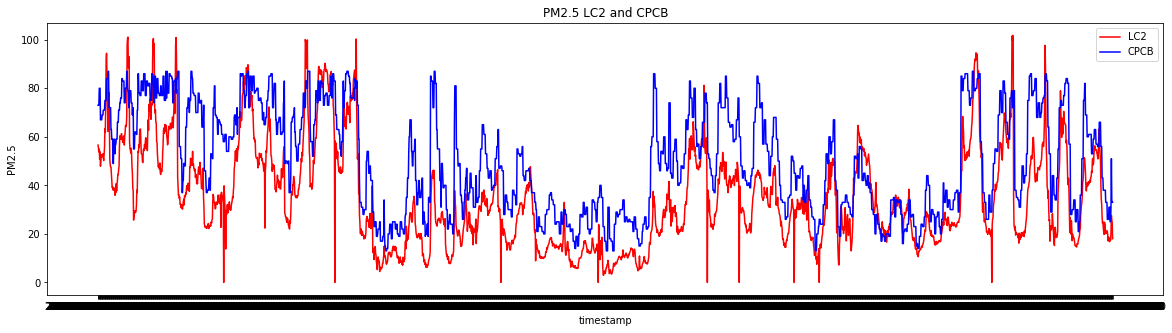

In [114]:
x = Lc15m['created_at']
y1 = Lc15m['lc2_pm25']
y2 = Lc15m['cpcb_pm25']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["LC2","CPCB"])
plt.title('PM2.5 LC2 and CPCB')
plt.show()

Coefficients:  [[0.88920288]]
Intercept:  [19.16688087]
R2  0.6605125616125647
MAE of simple linear regression 9.6945819580587
MSE of simple linear regression 157.63441005930304
RMSE of simple linear regression 12.55525428094959
Test data Spearman correlation of simple linear regression: 0.869
Train data Spearman correlation of simple linear regression: 0.874
Mean Absolute Error Random Forest: 8.679835977552742
Mean Squared Error Random Forest: 143.6011484169977
Root Mean Squared Error Random Forest: 11.983369660366725
Test data R-2 score Random Forest: 0.691
Test data Spearman correlation Random Forest: 0.84


<ipython-input-118-01ebcfc11ed5>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


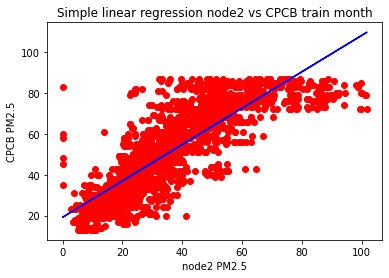

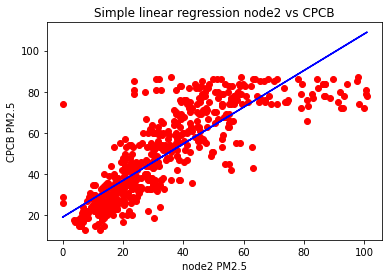

In [118]:
msk = (np.random.rand(len(Lc15m)) < 0.8)
train = Lc15m[msk]
test = Lc15m[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['lc2_pm25']])
train_y = np.asanyarray(train[['cpcb_pm25']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['lc2_pm25']])
test_y = np.asanyarray(test[['cpcb_pm25']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

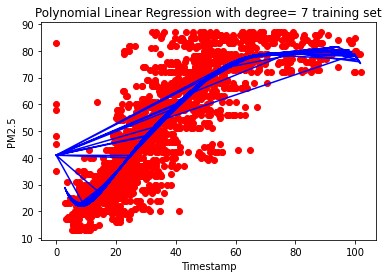

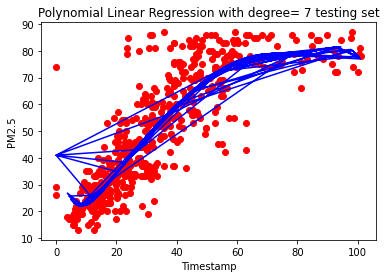

Mean Absolute Error polynomial linear regression: 7.804057660694044
Mean Squared Error polynomial linear regression: 112.43990507233931
Root Mean Squared Error polynomial linear regression: 10.603768437321673
Test data R-2 score polynomial linear regression: 0.758
Test data Spearman correlation polynomial linear regression: 0.871


In [126]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2 = PolynomialFeatures(degree=7)
X_poly2 = poly_reg2.fit_transform(train_x)
pol_reg2 = LinearRegression()
pol_reg2.fit(X_poly2, train_y)


plt.scatter(train_x, train_y, color='red')
plt.plot(train_x, pol_reg2.predict(poly_reg2.fit_transform(train_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 7 training set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()

plt.scatter(test_x, test_y, color='red')
plt.plot(test_x, pol_reg2.predict(poly_reg2.fit_transform(test_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 7 testing set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()

pred_y2 = pol_reg2.predict(poly_reg2.fit_transform(test_x))


print('Mean Absolute Error polynomial linear regression:', metrics.mean_absolute_error(test_y, pred_y2))
print('Mean Squared Error polynomial linear regression:', metrics.mean_squared_error(test_y, pred_y2))
print('Root Mean Squared Error polynomial linear regression:', np.sqrt(metrics.mean_squared_error(test_y, pred_y2)))
test_score = r2_score(test_y, pred_y2)
spearman = spearmanr(test_y, pred_y2)
#pearson = pearsonr(test_y, pred_y)

print(f'Test data R-2 score polynomial linear regression: {test_score:>5.3}')
print(f'Test data Spearman correlation polynomial linear regression: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

In [129]:
train_x1 = np.asanyarray(train[['lc2_pm25', 'cpcb_pm10']])
train_y1 = np.asanyarray(train[['cpcb_pm25']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['lc2_pm25', 'cpcb_pm10']])
test_y1 = np.asanyarray(test[['cpcb_pm25']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.32495697 0.33654185]]
Intercept:  [3.56588289]
R2  0.8919680561677762
MAE  5.481450223159886
MSE  50.16253860361577
RMSE  7.082551701443186
variance score = 0.8920154039167252
Test data Spearman correlation: 0.953
Mean Absolute Error Random Forest: 3.964928280882038
Mean Squared Error Random Forest: 32.44306127762316
Root Mean Squared Error Random Forest: 5.695881080010639
Test data R-2 score Random Forest:  0.93
Test data Spearman correlation Random Forest: 0.959


<ipython-input-129-ccadfe5a73c4>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [130]:
train_x = np.asanyarray(train[['lc2_pm25', 'lc2_pm10']])
train_y = np.asanyarray(train[['cpcb_pm25']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['lc2_pm25', 'lc2_pm10']])
test_y = np.asanyarray(test[['cpcb_pm25']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[-0.99352146  1.7199129 ]]
Intercept:  [17.68019135]
R2  0.6760974050587758
MAE  9.425521077983134
MSE  150.39789016278073
RMSE  12.263681753975057
variance score = 0.6760984518559701
Test data Spearman correlation: 0.877
Mean Absolute Error Random Forest: 8.33558598648194
Mean Squared Error Random Forest: 129.5058923850715
Root Mean Squared Error Random Forest: 11.38006557033269
Test data R-2 score Random Forest: 0.721
Test data Spearman correlation Random Forest: 0.853


<ipython-input-130-166b5c7aa88c>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


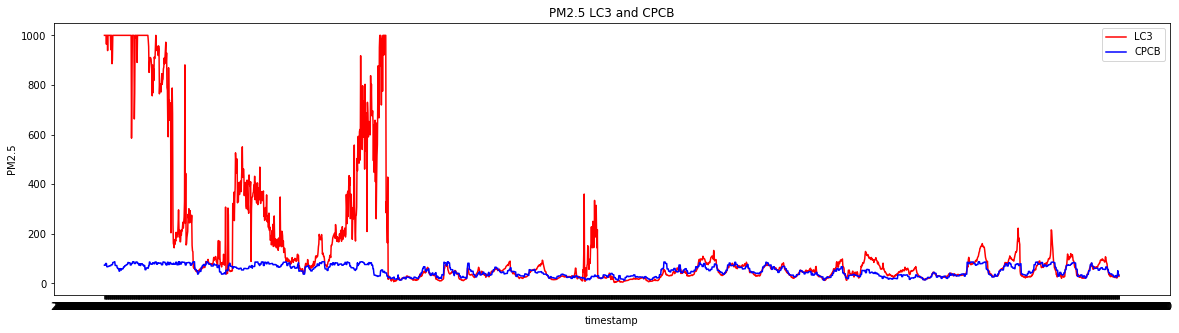

In [98]:
x = lc15min['created_at']
y1 = lc15min['lc3_pm25']
y2 = lc15min['cpcb_pm25']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["LC3","CPCB"])
plt.title('PM2.5 LC3 and CPCB')
plt.show()

In [99]:
# calculate summary statistics
lc15_mean, lc15_std = np.mean(lc15min['lc3_pm25']), np.std(lc15min['lc3_pm25'])

# identify outliers
cut_off = lc15_std * 3
lower, upper = lc15_mean - cut_off, lc15_mean + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
print("mean and standard deviation: ", lc15_mean, lc15_std)
#identifying outliers
outliers = [x for x in lc15min['lc3_pm25'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in lc15min['lc3_pm25']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
lc15m  = lc15min[lc15min['lc3_pm25'] < upper]

cut off:  751.9822626523908
lower and upper boundaries:  -599.51 904.45
mean and standard deviation:  152.47153513937909 250.6607542174636
Identified outliers: 142
Non-outlier observations: 2405


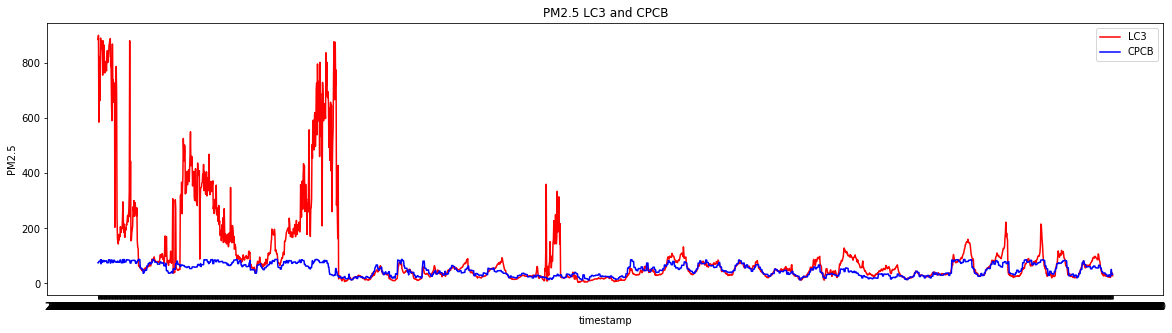

In [100]:
x = lc15m['created_at']
y1 = lc15m['lc3_pm25']
y2 = lc15m['cpcb_pm25']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["LC3","CPCB"])
plt.title('PM2.5 LC3 and CPCB')
plt.show()

In [101]:
lc15m  = lc15min[lc15min['lc3_pm25'] < 200]

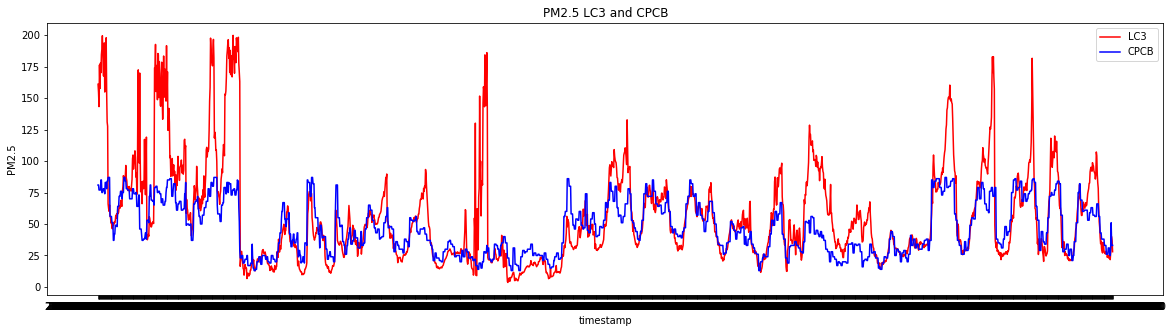

In [102]:
x = lc15m['created_at']
y1 = lc15m['lc3_pm25']
y2 = lc15m['cpcb_pm25']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["LC3","CPCB"])
plt.title('PM2.5 LC3 and CPCB')
plt.show()

In [111]:
# calculate summary statistics
lc15_mean, lc15_std = np.mean(lc15m['lc3_pm25']), np.std(lc15m['lc3_pm25'])

# identify outliers
cut_off = lc15_std * 3
lower, upper = lc15_mean - cut_off, lc15_mean + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
print("mean and standard deviation: ", lc15_mean, lc15_std)
#identifying outliers
outliers = [x for x in lc15m['lc3_pm25'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in lc15m['lc3_pm25']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
Lc15min  = lc15m[lc15m['lc3_pm25'] < upper]

cut off:  117.89493938853363
lower and upper boundaries:  -61.68 174.11
mean and standard deviation:  56.215518867924594 39.29831312951121
Identified outliers: 53
Non-outlier observations: 2067


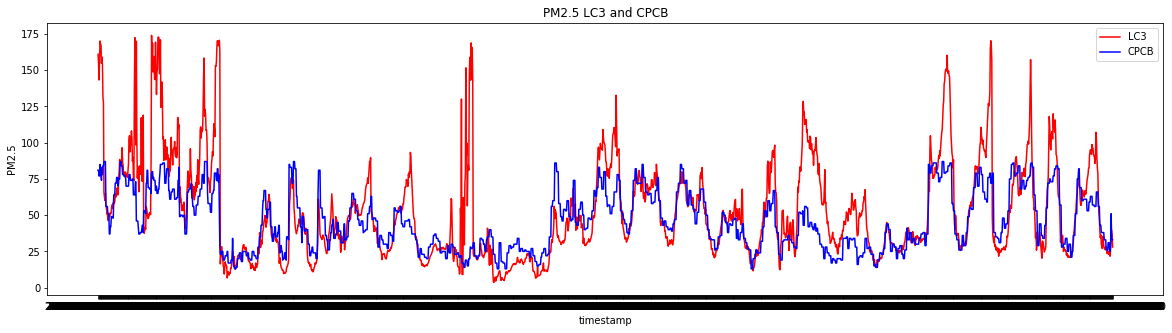

In [112]:
x = Lc15min['created_at']
y1 = Lc15min['lc3_pm25']
y2 = Lc15min['cpcb_pm25']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["LC3","CPCB"])
plt.title('PM2.5 LC3 and CPCB')
plt.show()

Coefficients:  [[0.42220725]]
Intercept:  [23.5766]
R2  0.5787926501840776
MAE of simple linear regression 10.618244998195237
MSE of simple linear regression 179.68811533683876
RMSE of simple linear regression 13.404779570617293
Test data Spearman correlation of simple linear regression: 0.815
Train data Spearman correlation of simple linear regression: 0.787
Mean Absolute Error Random Forest: 11.290576904251528
Mean Squared Error Random Forest: 238.76122948968677
Root Mean Squared Error Random Forest: 15.45190051384252
Test data R-2 score Random Forest:  0.44
Test data Spearman correlation Random Forest: 0.709


<ipython-input-131-07337fb37e6f>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


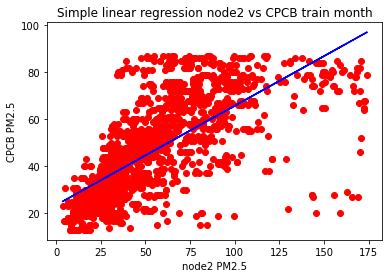

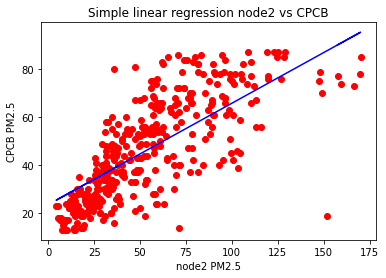

In [131]:
msk = (np.random.rand(len(Lc15min)) < 0.8)
train = Lc15min[msk]
test = Lc15min[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['lc3_pm25']])
train_y = np.asanyarray(train[['cpcb_pm25']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['lc3_pm25']])
test_y = np.asanyarray(test[['cpcb_pm25']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [132]:
train_x1 = np.asanyarray(train[['lc3_pm25', 'cpcb_pm10']])
train_y1 = np.asanyarray(train[['cpcb_pm25']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['lc3_pm25', 'cpcb_pm10']])
test_y1 = np.asanyarray(test[['cpcb_pm25']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.1421449  0.38442782]]
Intercept:  [1.72491309]
R2  0.8950478189289426
MAE  5.233768086707435
MSE  44.772864541396615
RMSE  6.691252837951695
variance score = 0.8952090925760795
Test data Spearman correlation: 0.948
Mean Absolute Error Random Forest: 3.7642797319933
Mean Squared Error Random Forest: 29.898497473478507
Root Mean Squared Error Random Forest: 5.46795185361745
Test data R-2 score Random Forest:  0.93
Test data Spearman correlation Random Forest: 0.962


<ipython-input-132-c8303feae70e>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [133]:
train_x1 = np.asanyarray(train[['lc3_pm25', 'lc3_pm10']])
train_y1 = np.asanyarray(train[['cpcb_pm25']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['lc3_pm25', 'lc3_pm10']])
test_y1 = np.asanyarray(test[['cpcb_pm25']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.30207396 0.08389237]]
Intercept:  [23.30305475]
R2  0.6102221271123298
MAE  10.21358625675157
MSE  166.2802213916633
RMSE  12.894968840275006
variance score = 0.610425032447793
Test data Spearman correlation: 0.834
Mean Absolute Error Random Forest: 8.48147822445561
Mean Squared Error Random Forest: 130.30943180485764
Root Mean Squared Error Random Forest: 11.415315668208988
Test data R-2 score Random Forest: 0.695
Test data Spearman correlation Random Forest: 0.839


<ipython-input-133-fe8edb72c41f>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


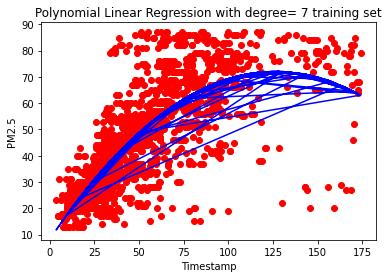

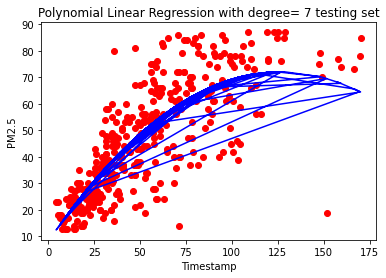

Mean Absolute Error polynomial linear regression: 9.29081192952584
Mean Squared Error polynomial linear regression: 151.18524903654662
Root Mean Squared Error polynomial linear regression: 12.29574109342526
Test data R-2 score polynomial linear regression: 0.646
Test data Spearman correlation polynomial linear regression: 0.814


In [141]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2 = PolynomialFeatures(degree=2)
X_poly2 = poly_reg2.fit_transform(train_x)
pol_reg2 = LinearRegression()
pol_reg2.fit(X_poly2, train_y)


plt.scatter(train_x, train_y, color='red')
plt.plot(train_x, pol_reg2.predict(poly_reg2.fit_transform(train_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 7 training set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()

plt.scatter(test_x, test_y, color='red')
plt.plot(test_x, pol_reg2.predict(poly_reg2.fit_transform(test_x)), color='blue')
plt.title('Polynomial Linear Regression with degree= 7 testing set')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.show()

pred_y2 = pol_reg2.predict(poly_reg2.fit_transform(test_x))


print('Mean Absolute Error polynomial linear regression:', metrics.mean_absolute_error(test_y, pred_y2))
print('Mean Squared Error polynomial linear regression:', metrics.mean_squared_error(test_y, pred_y2))
print('Root Mean Squared Error polynomial linear regression:', np.sqrt(metrics.mean_squared_error(test_y, pred_y2)))
test_score = r2_score(test_y, pred_y2)
spearman = spearmanr(test_y, pred_y2)
#pearson = pearsonr(test_y, pred_y)

print(f'Test data R-2 score polynomial linear regression: {test_score:>5.3}')
print(f'Test data Spearman correlation polynomial linear regression: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

# 1 hr data

In [ ]:
lc1h = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\.......")

In [ ]:
x = lc1h['created_at']
y1 = lc1h['lc2_pm25']
y2 = lc1h['cpcb_pm25']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["LC2","CPCB"])
plt.title('PM2.5 LC2 and CPCB 1hr')
plt.show()

In [ ]:
x = lc1['created_at']
y1 = lc1['lc3_pm25']
y2 = lc1['cpcb_pm25']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["LC3","CPCB"])
plt.title('PM2.5 LC3 and CPCB 1hr')
plt.show()